<a href="https://colab.research.google.com/github/serepina/Human_Detector_Comparison/blob/main/MMDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install MMDetection**

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 26kB/s 
     |████████████████████████████████| 6.6MB 56.8MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 225kB 13.3MB/s 
     |████████████████████████████████| 194kB 13.1MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.2.5-cp36-cp36m-linux_x86_64.whl size=20218418 sha256=aacb12bc27a6b4ac438a289b85c0fdd0e80ba292dc316b119e2110bb4f480659
  Stored in directory: /root/.cache/pip/wheels/1e/6a/d1/a824675d02cbe25db916fa987e87df21983bb75b3bb36cf4d0
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.


In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.8.0
10.1
GCC 7.5


# **Model Download**

In [4]:
#Mask R-CNN
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2021-01-10 08:11:36--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

checkpoints/mask_rc 100%[===================>] 169.63M  8.89MB/s    in 19s     

2021-01-10 08:11:57 (8.85 MB/s) - ‘checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



In [24]:
# Faster R-CNN
!cd checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_1x_coco/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth \
      -O checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth

--2021-01-10 10:31:57--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_1x_coco/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243515233 (232M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth’

checkpoints/faster_ 100%[===================>] 232.23M  9.78MB/s    in 26s     

2021-01-10 10:32:24 (8.77 MB/s) - ‘checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth’ saved [243515233/243515233]



In [29]:
# Cascade R-CNN
!cd checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_caffe_fpn_1x_coco/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth \
      -O checkpoints/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth

--2021-01-10 10:50:00--  http://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_caffe_fpn_1x_coco/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277864232 (265M) [application/octet-stream]
Saving to: ‘checkpoints/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth’

checkpoints/cascade 100%[===================>] 264.99M  8.57MB/s    in 32s     

2021-01-10 10:50:34 (8.40 MB/s) - ‘checkpoints/cascade_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.404_20200504_174853-b857be87.pth’ saved [277864232/277864232]



In [33]:
# YOLOv3
!cd checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-416_273e_coco/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth \
      -O checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth

--2021-01-10 10:56:26--  http://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-416_273e_coco/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248091504 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  8.59MB/s    in 28s     

2021-01-10 10:56:56 (8.43 MB/s) - ‘checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth’ saved [248091504/248091504]



In [38]:
# NAS-FPN
!cd checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/nas_fpn/retinanet_r50_nasfpn_crop640_50e_coco/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth \
      -O checkpoints/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth

--2021-01-10 11:02:40--  http://download.openmmlab.com/mmdetection/v2.0/nas_fpn/retinanet_r50_nasfpn_crop640_50e_coco/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315989037 (301M) [application/octet-stream]
Saving to: ‘checkpoints/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth’

checkpoints/retinan 100%[===================>] 301.35M  8.34MB/s    in 35s     

2021-01-10 11:03:19 (8.49 MB/s) - ‘checkpoints/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth’ saved [315989037/315989037]



# **Drive 연결**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Perform inference with a MMDet detector**

In [40]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/nas_fpn/retinanet_r50_nasfpn_crop640_50e_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

/usr/local/lib/python3.6/dist-packages/mmcv/cnn/bricks/conv_module.py:107: UserWarning: ConvModule has norm and bias at the same time
  warnings.warn('ConvModule has norm and bias at the same time')


In [ ]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

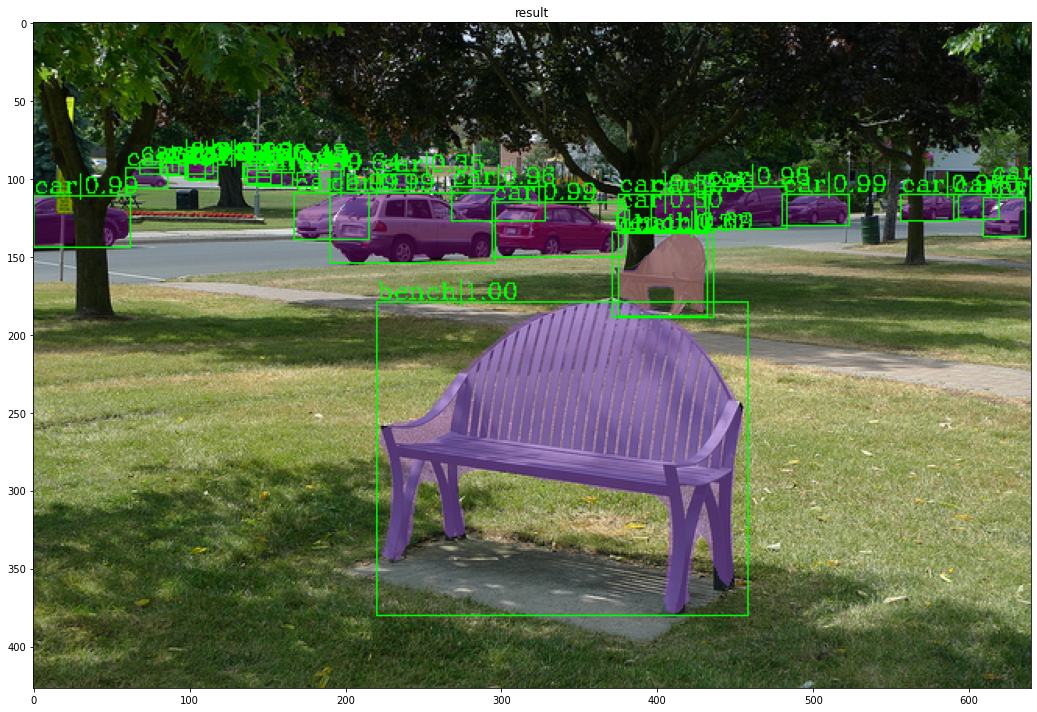

In [7]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

# **Video Result**

In [43]:
import time
import cv2
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/test3.mp4')

fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(3)) # float
height = int(cap.get(4)) # float

fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
vout = cv2.VideoWriter('/content/drive/MyDrive/Colab Notebooks/MMdetect_NAS-FPN_3.mp4', fourcc, fps, (width,height))

start = time.time()  # 시작 시간 저장
while (cap.isOpened()):
  ret, img = cap.read()

  if ret:
    # Use the detector to do inference
    result = inference_detector(model, img)
    if hasattr(model, 'module'):
        model = model.module
    img = model.show_result(img, result, score_thr=0.3, show=False)
    #cv2_imshow(img)
    vout.write(img)

  else:
    print("time :", time.time() - start)
    break

cap.release()
cv2.destroyAllWindows()

time : 35.00127410888672
